# Calculating the longitudinal field (Bz) and False Alarm Probability (FAP)

The calculation of the longitudinal field from a Stokes V line profile is done using:

$$B_{||} = \frac{1}{g_\mathrm{eff} \lambda_{B,\mathrm{const}} \lambda_o c}\frac{\int vV(v)dv}{\int (1-I(v))dv},$$

where $I$ and $V$ are in fact $I/I_c$ and $V/I_c$, and

$$\lambda_{B,\mathrm{const}} = \frac{e}{4\pi m_e c^2} = 4.67\times 10^{-13} \mathrm{Angstrom}^{-1} \mathrm{G}^{-1}$$

Note that the `calc_bz` function of the LSD Class presented here requires $\lambda_o$ to be given in nanometers.

We also compute the False Alarm Probability (FAP) of a signal in Stokes V and the null profile, over the same velocity range used in the Bz calculation. The FAP is the p-value corresponding to the probability of getting a devitation from V=0 that results into a $\chi^2$ equal or larger to the one observed. 
* For a definitive detection, FAP < $10^{-5}$
* For a marginal detection, FAP < $10^{-3}$

## 0. Importing Necessary Packages

In [1]:
import specpolFlow as pol
import pandas as pd
import copy

## 1. Example with one LSD profile

To start, we first load in an LSD profile and use the built-in plotting routine to visualize the Stokes V, null, and I profiles.

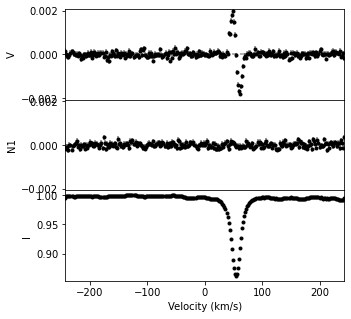

In [2]:
lsd = pol.read_lsd('CalculateBz_tutorialfiles/SampleLSD.s')
fig, ax = lsd.plot(figsize=(5,5))

To calculate Bz, we simply call the `calc_bz` function. In this example, we have the Bz routine display a diagnostic graph. The result is returned as a dictionary, which can be converted to a Pandas dataframe, which is also displayed. 

In the example above, we set the `velrange` option to [0,100] -- this range is used to calculate the center-of-gravity of the profile, with the `cog='I'` method. The LSD profile *outside* of velrange is used to calcualte the normalization to the continnum, because `norm='auto'`. See the manual for more options. 

The Bz is then calculated in a range `bzwidth=30` km/s on each side of the cog. Once again, there are many flexible option to suit your needs, so please have a look at the function's manual. 

NOTE: In old LSD profiles that do not have a Null2 column, the LSD class replaces N2 with zeros, which means that the N2 Bz will also be set to zero

using AUTO method for the normalization
  using the median of the continuum outside of the line


,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,0.997030,53.359239,23.359239,83.359239,94.104997,8.805572,0.000000,-1.920536,8.631324,0.766081,0.000000,0.000000,0.000000


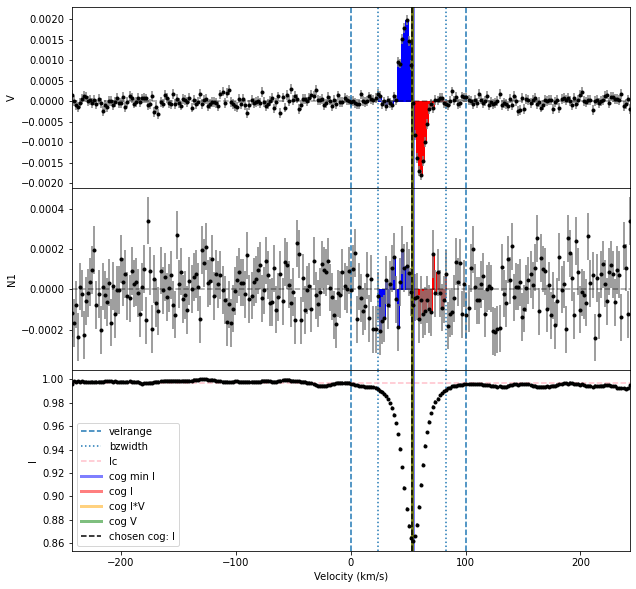

In [3]:
Bz, fig = lsd.calc_bz(norm='auto', cog='I', 
                   velrange=[0,100],bzwidth=30, 
                   geff=1.2, lambda0=500,
                   plot=True, )    

Bz = pd.DataFrame(data=[Bz])

# simple display of the pandas dataframe
Bz.style

For more information on how to manipulate a dataframe, we recommend you look over the [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html). Below, we demonstrate how to quickly extract a particular value from the dataframe.

In [4]:
# to extract the entry for the Bz column:
print(Bz.at[0,"V bz (G)"])

# the 0 is the index of the row (there is only one row)

94.10499747294118


## 3. Looping over Bz calculations for a single result table. 

Below, we loop over a list of LSD profiles, concatenate all of the resulting Pandas dataframe rows into a single column, and add a column with the name of the stars. This process is helpful if you are want to calculate Bz for multiple stars at the same time.

In [13]:
files = ['SampleLSD.s', 'SampleLSD2.s']

for i in range(len(files)):
    # loading the LSD profile
    print('### {}'.format(files[i]))
    lsd = pol.read_lsd('CalculateBz_tutorialfiles/{}'.format(files[i]))
    Bz = lsd.calc_bz(cog='I', velrange=[0,100], plot=False,
      bzwidth=30, lambda0=500 ) 
    Bz = pd.DataFrame(data=[Bz])
    if i==0:
        Bz_table=copy.copy(Bz)
    else:
        Bz_table = pd.concat([Bz_table, Bz], ignore_index = True)
        
# let's add a column to the table with the filename
Bz_table.insert(0, "Filename", files, True)

# you can add a row to the table with the names of the LSD profiles. 
names = ['HD1', 'HD2']
Bz_table.insert(0, "Star", names, True)

# display the table
Bz_table.style

### SampleLSD.s
using AUTO method for the normalization
  using the median of the continuum outside of the line
### SampleLSD2.s
using AUTO method for the normalization
  using the median of the continuum outside of the line


,Star,Filename,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,HD1,SampleLSD.s,0.997030,53.359239,23.359239,83.359239,94.104997,8.805572,0.000000,-1.920536,8.631324,0.766081,0.000000,0.000000,0.000000
1,HD2,SampleLSD2.s,0.995290,22.391082,-7.608918,52.391082,33.664584,22.348803,0.003250,6.933104,22.348366,0.965210,0.000000,0.000000,0.000000


To save this table as an ascii file, csv file, or whatever file is best suited to your needs please see the [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html). Below, we save the table as a csv file.

In [6]:
Bz_table.to_csv('CalculateBz_tutorialfiles/BzTable.csv')

You can access individual entries in the dataframe as shown above, but you can also extract rows and columns. Here are a few examples of this:

In [7]:
# get the row for HD2 only:
HD2 = Bz_table[Bz_table["Star"]=='HD2']
HD2.style

,Star,Filename,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
1,HD2,SampleLSD2.s,0.995290,22.391082,-7.608918,52.391082,33.664584,22.348803,0.003250,6.933104,22.348366,0.965210,0.000000,0.000000,0.000000


In [8]:
# get the column for the Ic and cog values
Subset = Bz_table[["Ic", "cog"]]
Subset.style

,Ic,cog
0,0.997030,53.359239
1,0.995290,22.391082


In [9]:
# turn this into a numpy array
arr = Subset.to_numpy()
print(arr)

[[ 0.99703    53.35923946]
 [ 0.99529    22.39108208]]
